In [11]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib as mpl
from matplotlib import pyplot as plt
import pandas as pd
from os import path

mpl.rcParams['figure.figsize'] = [30.0, 15.0]
HDFStore=pd.HDFStore

%matplotlib inline

In [2]:
!ls /data/elekin/data

origin	results


In [3]:
# loading data parameters
num_coefficients=17
root_path="data/elekin/data"
hw_results_path= "/data/elekin/data/results/handwriting"
seed=38

In [4]:
#Load data from hdf5 file
rdo_root_path = path.join(root_path,hw_results_path)
h5file = path.join(rdo_root_path, "archimedean-")
h5filename = h5file + str(num_coefficients) + ".h5"
print(h5filename)
hdf = HDFStore(h5filename)

h5_outputfile = path.join(rdo_root_path, "archimedean-")
h5_output_filename = h5_outputfile + str(num_coefficients) + "-splits" +".h5"
print(h5_output_filename)

/data/elekin/data/results/handwriting/archimedean-17.h5
/data/elekin/data/results/handwriting/archimedean-17-splits.h5


In [5]:
h5filename

'/data/elekin/data/results/handwriting/archimedean-17.h5'

In [6]:
#Load timeseries and labels
raw_df = hdf['results/residues/rd'].T
raw_labels_df = hdf.get('source/labels')
raw_dataset = raw_df.join(raw_labels_df)

In [7]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_df = pd.DataFrame(scaler.fit_transform(raw_df))

In [8]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df, raw_labels_df, test_size=0.33, random_state=seed)

In [9]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((33, 4096), (33,), (17, 4096), (17,))

Text(0.5, 1.0, 'Test dataset split')

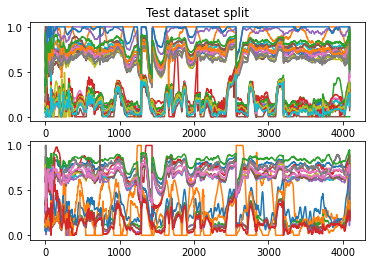

In [12]:
fig, (ax1,ax2) = plt.subplots(2,1)
X_train.T.plot(legend=False, ax=ax1)
ax1.set_title("Train dataset split")
X_test.T.plot(legend=False, ax=ax2)
ax1.set_title("Test dataset split")

In [13]:
X_train.to_hdf(h5_output_filename, "residues/train/features")
y_train.to_hdf(h5_output_filename, "residues/train/labels")
X_test.to_hdf(h5_output_filename, "residues/test/features")
y_test.to_hdf(h5_output_filename, "residues/test/labels")

In [14]:
hdf.close()

In [15]:
hdf = HDFStore(h5_output_filename)
hdf.keys()

['/results/residues/rd/norm/std/window',
 '/results/residues/rd/norm/std/window/x_test',
 '/results/residues/rd/norm/std/window/x_train',
 '/results/residues/rd/norm/std/window/y_test',
 '/results/residues/rd/norm/std/window/y_train',
 '/results/residues/features/norm',
 '/results/residues/features/norm/x_test',
 '/results/residues/features/norm/x_train',
 '/results/residues/features/norm/y_test',
 '/results/residues/features/norm/y_train',
 '/results/radius/r/norm/std/window',
 '/results/radius/r/norm/std/window/x_test',
 '/results/radius/r/norm/std/window/x_train',
 '/results/radius/r/norm/std/window/y_test',
 '/results/radius/r/norm/std/window/y_train',
 '/results/radius/features/norm',
 '/results/radius/features/norm/x_test',
 '/results/radius/features/norm/x_train',
 '/results/radius/features/norm/y_test',
 '/results/radius/features/norm/y_train',
 '/residues/train/features',
 '/residues/train/labels',
 '/residues/test/features',
 '/residues/test/labels']

In [16]:
hdf.close()